In [32]:
import string 

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [33]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/barraharrison/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
df = pd.read_csv("spam_ham_dataset.csv")

In [35]:
df["text"] = df["text"].apply(lambda x: x.replace("\r\n", " "))

In [36]:
# We only need the text and label_num columns from the dataset

In [37]:
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291 thi...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001 ( see at...",0
2,3624,ham,"Subject: neon retreat ho ho ho , we ' re aroun...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs this deal is to b...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft the transport vo...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms hpl c...,0
5168,2933,ham,Subject: calpine daily gas nomination > > juli...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


# Data Preprocessing

In [39]:
# Removing the punctuation and turn everything into lowercase

In [40]:
stemmer = PorterStemmer()

In [41]:
stemmer.stem("running")

'run'

In [42]:
stemmer.stem("talking")

'talk'

In [43]:
stemmer.stem("Hello")

'hello'

In [44]:
stemmer = PorterStemmer()
corpus = []

stopwords_set = set(stopwords.words("english"))

for i in range(len(df)):
    text = df["text"].iloc[i].lower()
    text = text.translate(str.maketrans(" ", " ", string.punctuation)).split()
    text = [stemmer.stem(word) for word in text if word not in stopwords_set]
    text = " ".join(text)
    corpus.append(text)

In [45]:
df.text.iloc[0]

"Subject: enron methanol ; meter # : 988291 this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary flow data provided by daren } . please override pop ' s daily volume { presently zero } to reflect daily activity you can obtain from gas control . this change is needed asap for economics purposes ."

In [46]:
corpus[0]

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [47]:
df.text.iloc[1]

'Subject: hpl nom for january 9 , 2001 ( see attached file : hplnol 09 . xls ) - hplnol 09 . xls'

In [48]:
corpus[1]

'subject hpl nom januari 9 2001 see attach file hplnol 09 xl hplnol 09 xl'

In [50]:
vectorizer = CountVectorizer()

# X data is going to be the email content
X = vectorizer.fit_transform(corpus).toarray()
y = df.label_num

# Test Data is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
clf = RandomForestClassifier(n_jobs=-1)
# n_jobs -1 is going to instruct the model to use all the cpu cores (faster)

clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [52]:
# Evaluating the model on the test data
clf.score(X_test, y_test)

0.9748792270531401

In [53]:
# The model performs well (97%)

In [54]:
email_to_classify = df.text.values[2]

In [55]:
email_to_classify

"Subject: neon retreat ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time ! i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute . on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about . i think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a pote

In [56]:
# Going to classify the above email as spam or not-spam

In [57]:
email_text = email_to_classify.lower().translate(str.maketrans(" ", " ", string.punctuation)).split()
email_text = [stemmer.stem(word) for word in text if word not in stopwords_set]
email_text = " ".join(email_text)

email_corpus = [email_text]

# Just call transform on the already-fitted vectorizer
X_email = vectorizer.transform(email_corpus)

In [58]:
clf.predict(X_email)

array([1])

In [59]:
df.label_num.iloc[2]

np.int64(0)

# EDA (Exploratory Data Analysis) 

In [60]:
# Looking at the number of spam vs. non-spam emails in the dataset

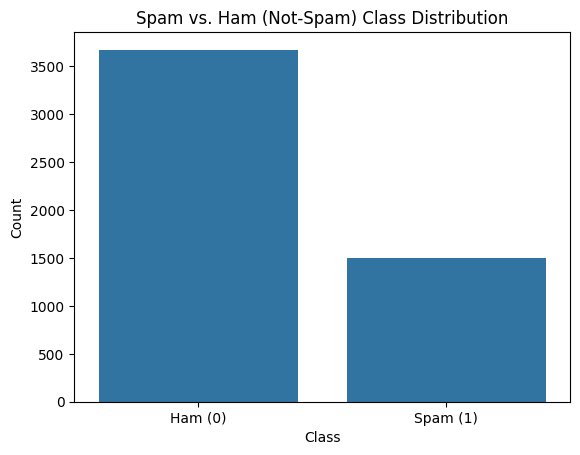

Class distribution (%):
 label_num
0    71.01141
1    28.98859
Name: proportion, dtype: float64


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
sns.countplot(data=df, x='label_num')
plt.title('Spam vs. Ham (Not-Spam) Class Distribution')
plt.xticks(ticks=[0, 1], labels=['Ham (0)', 'Spam (1)'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


class_percentages = df['label_num'].value_counts(normalize=True) * 100
print("Class distribution (%):\n", class_percentages)

In [65]:
# Emails are 71% Not-Spam and 28% are spam

## Word Frequency Analysis

In [66]:
# Using CountVectorizer to get the most frequent words in Ham and Spam Emails

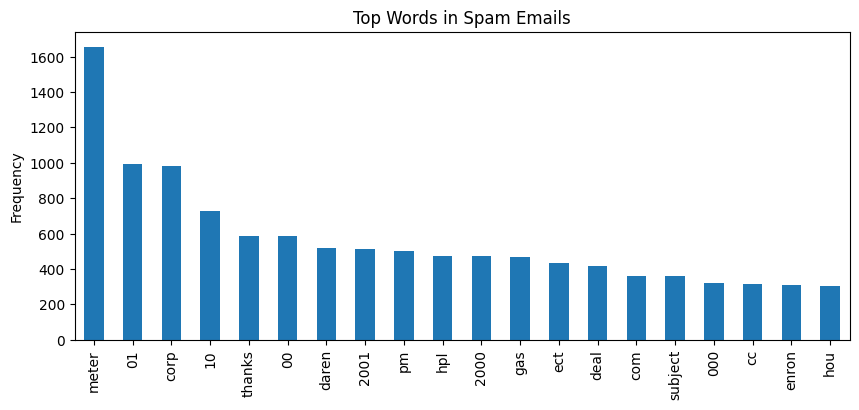

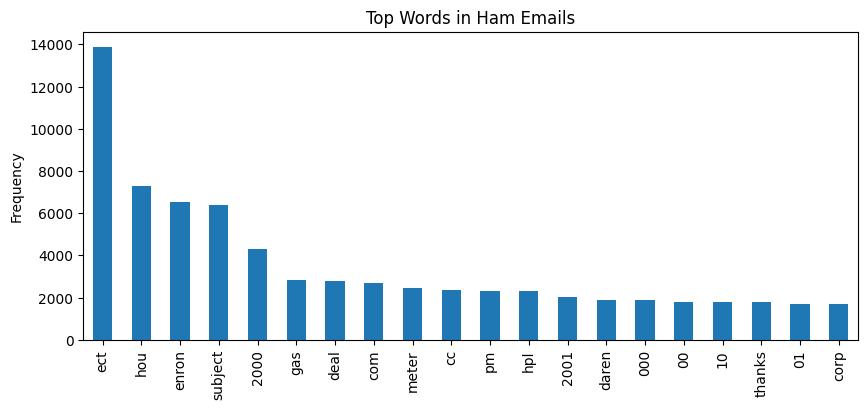

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

# Separate spam and ham texts
spam_texts = df[df['label_num'] == 1]['text']
ham_texts = df[df['label_num'] == 0]['text']

# Initialize vectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=20)

# Fit and transform
spam_counts = vectorizer.fit_transform(spam_texts)
ham_counts = vectorizer.fit_transform(ham_texts)

# Convert to DataFrame
spam_word_freq = pd.DataFrame(spam_counts.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
ham_word_freq = pd.DataFrame(ham_counts.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Plot top spam words
spam_word_freq.plot(kind='bar', title='Top Words in Spam Emails', figsize=(10, 4))
plt.ylabel("Frequency")
plt.show()

# Plot top ham words
ham_word_freq.plot(kind='bar', title='Top Words in Ham Emails', figsize=(10, 4))
plt.ylabel("Frequency")
plt.show()


## Message Length Distribution

In [68]:
# Looking to see if there is a pattern when it comes to message length

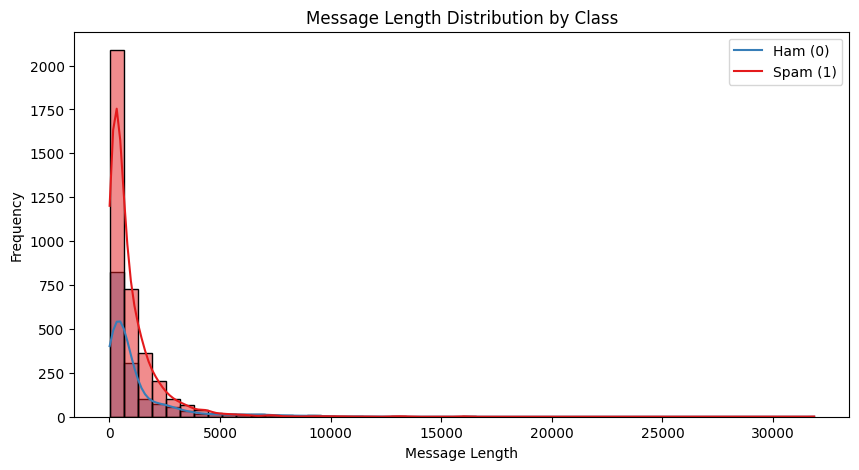

In [69]:
# Add a column for message length
df['message_length'] = df['text'].apply(len)

# Plot distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='message_length', hue='label_num', bins=50, kde=True, palette='Set1')
plt.title('Message Length Distribution by Class')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend(['Ham (0)', 'Spam (1)'])
plt.show()


In [71]:
# Spam Emails tend to have a shorter length compared to Ham emails